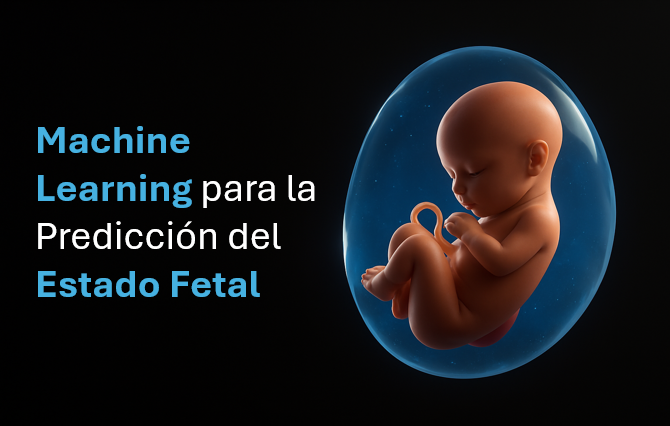

# **Objetivo :**
Desarrollar un modelo de Machine Learning capaz de predecir el estado fetal a partir de datos obtenidos del analisis de la frecuencia cardiaca feta y la actividad uterina del feto.

# **Contenido:**

 1.   Pipeline / Recoleccíon de datos.
 2.   Pipeline / Análisis Exploratido de datos (EDA):

*   Análsis de distribución de datos
*   Balanceo de datos
*   Análisis Univariado
   - Normalización de datos
*   Análisis Bivariado
   - Matriz de Correlación



3.   Pipeline / División de datos
4.   Pipeline/ Selección, Contrucción y Entrenamiento del modelo.
5.   Pipeline/ Evaluación del modelo
*    Evaluación general
*    Evaluaciones particulares
*    Matrix de Confusión



# **1. PIPELINE/RECOLECCIÓN DE DATOS**

## 1.1 Importar librerias necesarias

In [ ]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Para classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Para balancear datos
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

!pip install xgboost scikit-learn
import xgboost as xgb
from xgboost import XGBClassifier


## 1.2 Importar dataset

In [2]:
# Se vincula los archivos de Google Drive con Colab
from google.colab import drive
drive.mount('/content/drive')
#Leer el DataSet
data_health = pd.read_csv('/content/drive/MyDrive/Proyecto Final - Bootcamp/Dataset/fetal_health.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. PIPELINE/ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

## 2.1 Imprir los datos y sus caracteristicas para una mejor comprensión

In [3]:
# Se imprime la informacion del dataset
data_health.info()
data_health.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


## ⏩ **Analisis:**

* Hay un total de 21 Fetures Predictivos y 1 Feature Objetivo
* El Feture Objetivo (fetal_health) corresponde al estado fetal y se divide en tres valores numericos que, con base a la descripción del dataset, califican el estado del feto:
  - 1.0 (Normal)
  - 2.0 (Sospechoso)
  - 3.0 (Patologico)

* El data set contiene un total de 2126 datos o intancias.
* No contiene valores nulos.
* Todos los datos de cada feature son numericos (float64), por tanto, no será necesario codificar features.

## 2.2 Demostrar que no tiene valores nulos

In [4]:
# Se identifica si tenemos datos nulos
data_health.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


## 2.3 Cambiar clases numerico de la variable objetivo para mejorar la flexibilidad del testeo de los modelos ( 3.0 -> 2.0,  2.0 -> 1.0,  1.0 -> 0.0 )

In [5]:
# Cambiar clases numericas en el feature objetivo
data_health["fetal_health"] = data_health["fetal_health"].map({1.0: 0.0, 2.0: 1.0, 3.0: 2.0})
# Comprobar cambios
data_health.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,2.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,2.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,2.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,2.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,2.0


## 2.4 Traducir los features del ingles al español para una mejor comprensión

In [6]:
# Se renombra los features en su traducción al español
data_health = data_health.rename(columns={
    'baseline value': 'frecuencia_cardíaca_basal',
    'accelerations': 'aceleraciones',
    'fetal_movement': 'movimiento_fetal',
    'uterine_contractions': 'contracciones_uterinas',
    'light_decelerations': 'desaceleraciones_leves',
    'severe_decelerations': 'desaceleraciones_severas',
    'prolongued_decelerations': 'desaceleraciones_prolongadas',
    'abnormal_short_term_variability': 'variabilidad_corto_plazo_anormal',
    'mean_value_of_short_term_variability': 'media_variabilidad_corto_plazo',
    'percentage_of_time_with_abnormal_long_term_variability': 'por_tiempo_VLP_anormal',
    'mean_value_of_long_term_variability': 'media_variabilidad_largo_plazo',
    'histogram_width': 'ancho_histograma',
    'histogram_min': 'minimo_histograma',
    'histogram_max': 'maximo_histograma',
    'histogram_number_of_peaks': 'picos_en_histograma',
    'histogram_number_of_zeroes': 'ceros_en_histograma',
    'histogram_mode': 'moda_histograma',
    'histogram_mean': 'media_histograma',
    'histogram_median': 'mediana_histograma',
    'histogram_variance': 'varianza_histograma',
    'histogram_tendency': 'tendencia_histograma',
    'fetal_health': 'salud_fetal'
})

# Crompobar traducción
data_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   frecuencia_cardíaca_basal         2126 non-null   float64
 1   aceleraciones                     2126 non-null   float64
 2   movimiento_fetal                  2126 non-null   float64
 3   contracciones_uterinas            2126 non-null   float64
 4   desaceleraciones_leves            2126 non-null   float64
 5   desaceleraciones_severas          2126 non-null   float64
 6   desaceleraciones_prolongadas      2126 non-null   float64
 7   variabilidad_corto_plazo_anormal  2126 non-null   float64
 8   media_variabilidad_corto_plazo    2126 non-null   float64
 9   por_tiempo_VLP_anormal            2126 non-null   float64
 10  media_variabilidad_largo_plazo    2126 non-null   float64
 11  ancho_histograma                  2126 non-null   float64
 12  minimo

# Análisis de districucion de los datos en el feature objetivo 'salud_fetal' :
 A continuación, se comprueba la distribución de los datos del target 'fetal_health' y se análiza si necesita balancearlos.


In [7]:
# Se corrobora si el dataset está balanceado
class_distribution = data_health['salud_fetal'].value_counts()
print("Distribución de clases:")
print(class_distribution)

Distribución de clases:
salud_fetal
0.0    1655
1.0     295
2.0     176
Name: count, dtype: int64


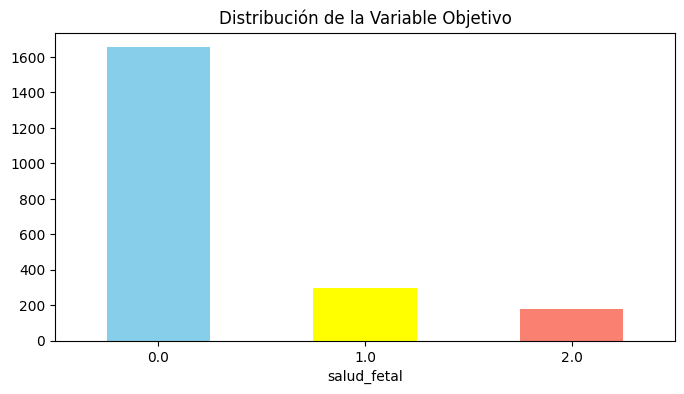

In [8]:
# Análisis de la distribución de la variable target
colores = ['skyblue', 'yellow', 'salmon']

plt.figure(figsize=(8, 4))
data_health["salud_fetal"].value_counts().plot(
    kind="bar",
    title="Distribución de la Variable Objetivo",
    color=colores
)
plt.xticks(rotation=0)
plt.show()

## Interpretación:

Recordar que los velores en el eje X se modificó y corresponde al los estados fetales donde:
- 0.0 : Normal
- 1.0 : Sospechoso
- 2.0 : Patológico

Teniendo esto en cuenta, Hay mas de 1600 datos que corresponden al estado fetal "Normal" (0.0) frente a los 295 y 176 datos sobre el estado fetal "Sospechoso" y "Patológico" (1.0 y 2.0) respectivamente, esto significa que los datos **NO** se encuentran balanceados, por lo que es necesario balancearlos para evitar que el modelo haga predicciones poco precisas.






# **Balanceo de datos**

A continuación, crearemos una copia de seguridad del dataset original y procedemos a balancear los datos por medio de la función SMOTETomek.

In [9]:
# Crear una copoia del dataset
data_original = data_health.copy()

In [10]:
# Definir variables predictoras y la variable objetivo
X = data_health.drop(columns=["salud_fetal"])
y = data_health["salud_fetal"]

In [11]:
# Aplicación Combinación de SMOTE y Tomek links
smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
data_balanceada = pd.DataFrame(X_combined, columns=X.columns)
data_balanceada["data_health"] = y_combined  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Número de muestras después de SMOTE + Tomek: 4951
Distribución después de SMOTE + Tomek:
salud_fetal
0.0    1651
2.0    1651
1.0    1649
Name: count, dtype: int64


In [12]:
data_balanceada = pd.DataFrame(X_combined, columns=X.columns)
data_balanceada["Target"] = y_combined  # Agregar la variable objetivo balanceada reemplazando la anterior

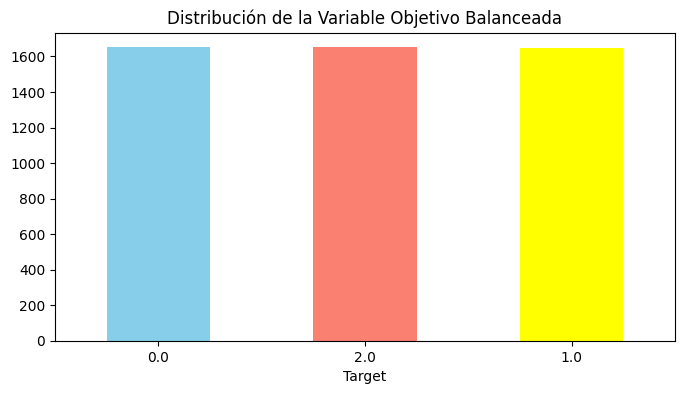

In [13]:
# Análisis de la distribución de la variable target balanceada
colores = ['skyblue', 'salmon', 'yellow']

plt.figure(figsize=(8, 4))
data_balanceada["Target"].value_counts().plot(
    kind="bar",
    title="Distribución de la Variable Objetivo Balanceada",
    color=colores
)
plt.xticks(rotation=0)
plt.show()

#Interpretación:

* Los datos se encuentran balanceados y cada uno de ellos tienen mas de 1600 datos.
* El balanceo creó 2825 datos sinteticos nuevos.
* Ahora el dataset contiene todos los datos posibles y necesarios para entrenarlo.

# 📊 Análisis Univariado:

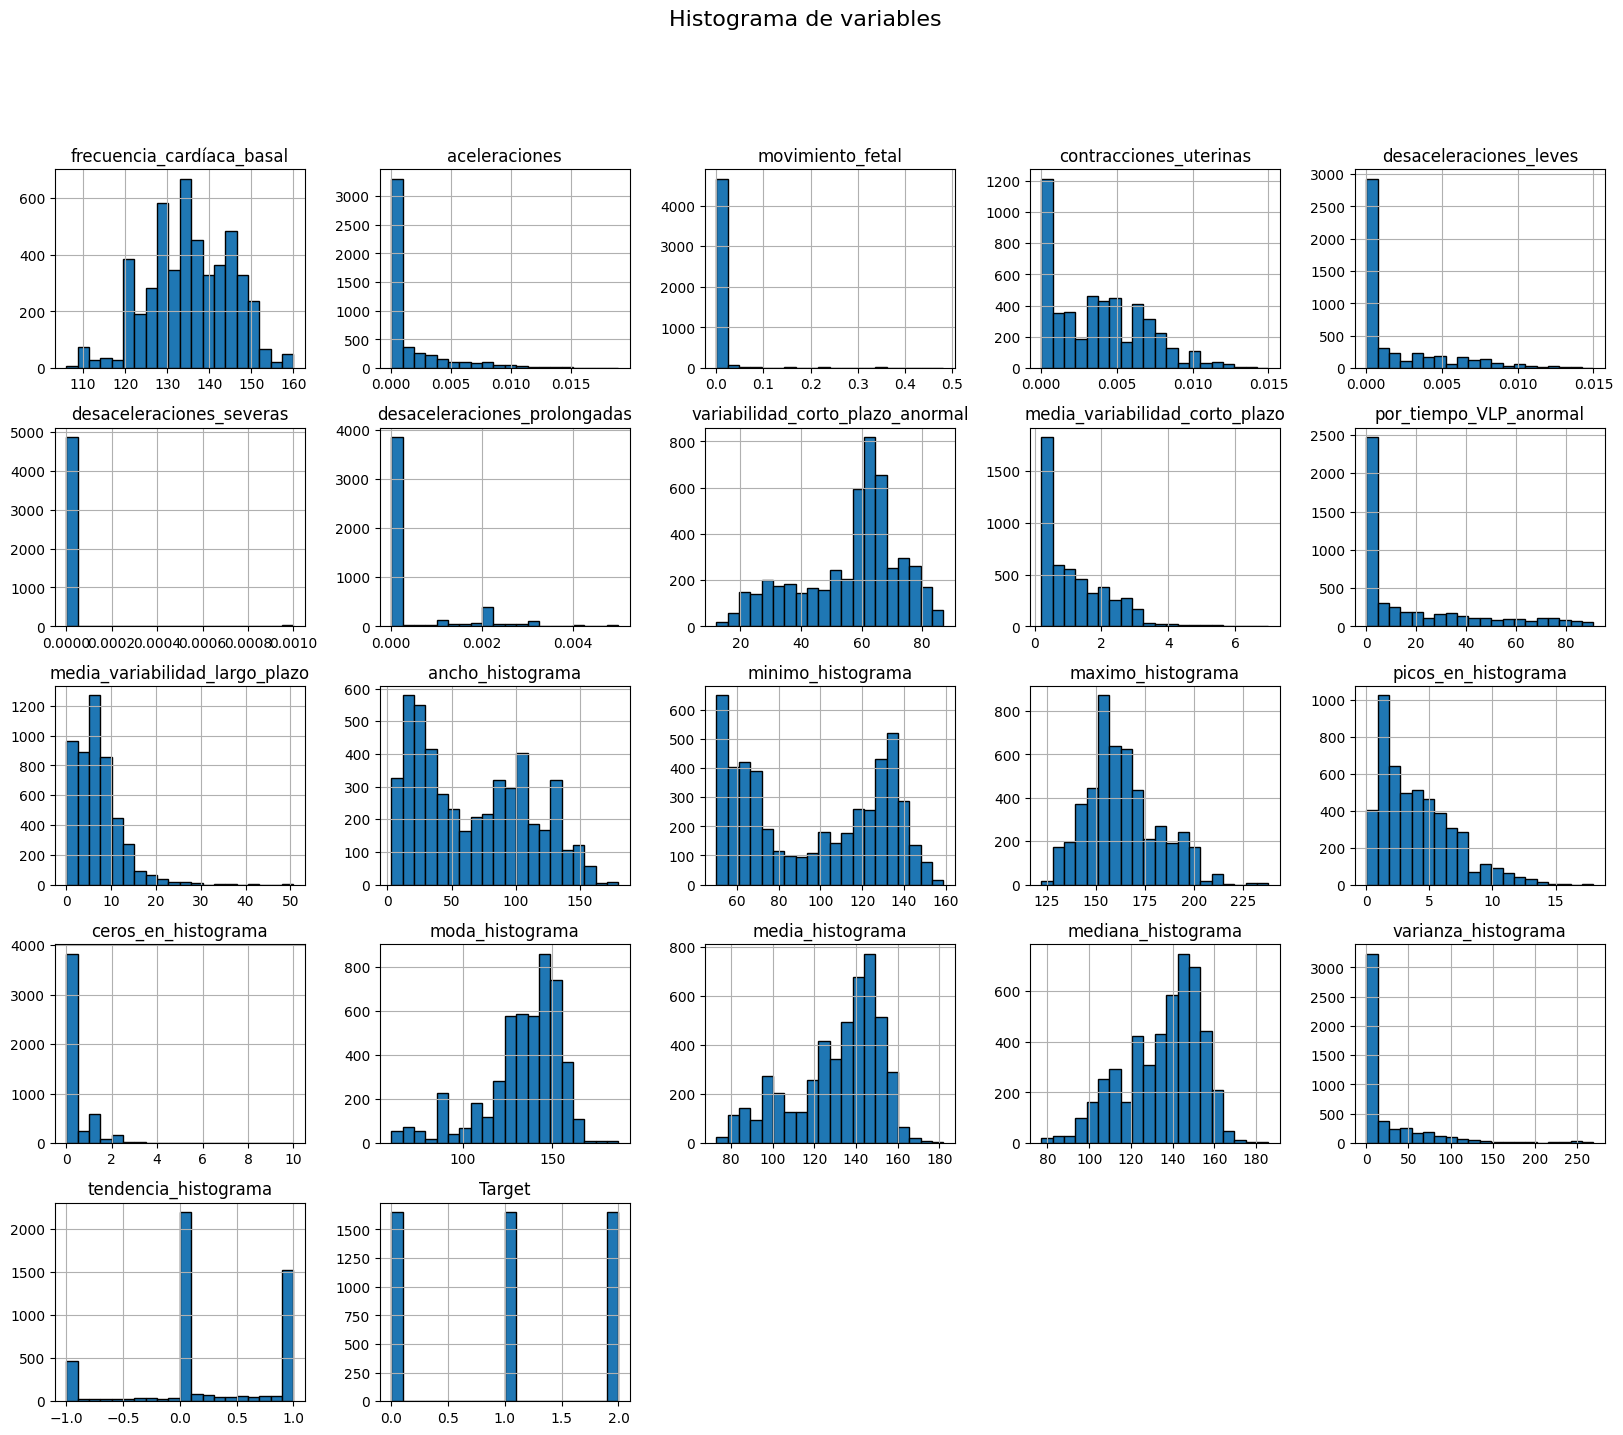

In [14]:
# Histograma de cada variable numérica
data_balanceada.hist(figsize=(20, 16), bins=20, edgecolor='black')
plt.suptitle("Histograma de variables", fontsize=16)
plt.show()

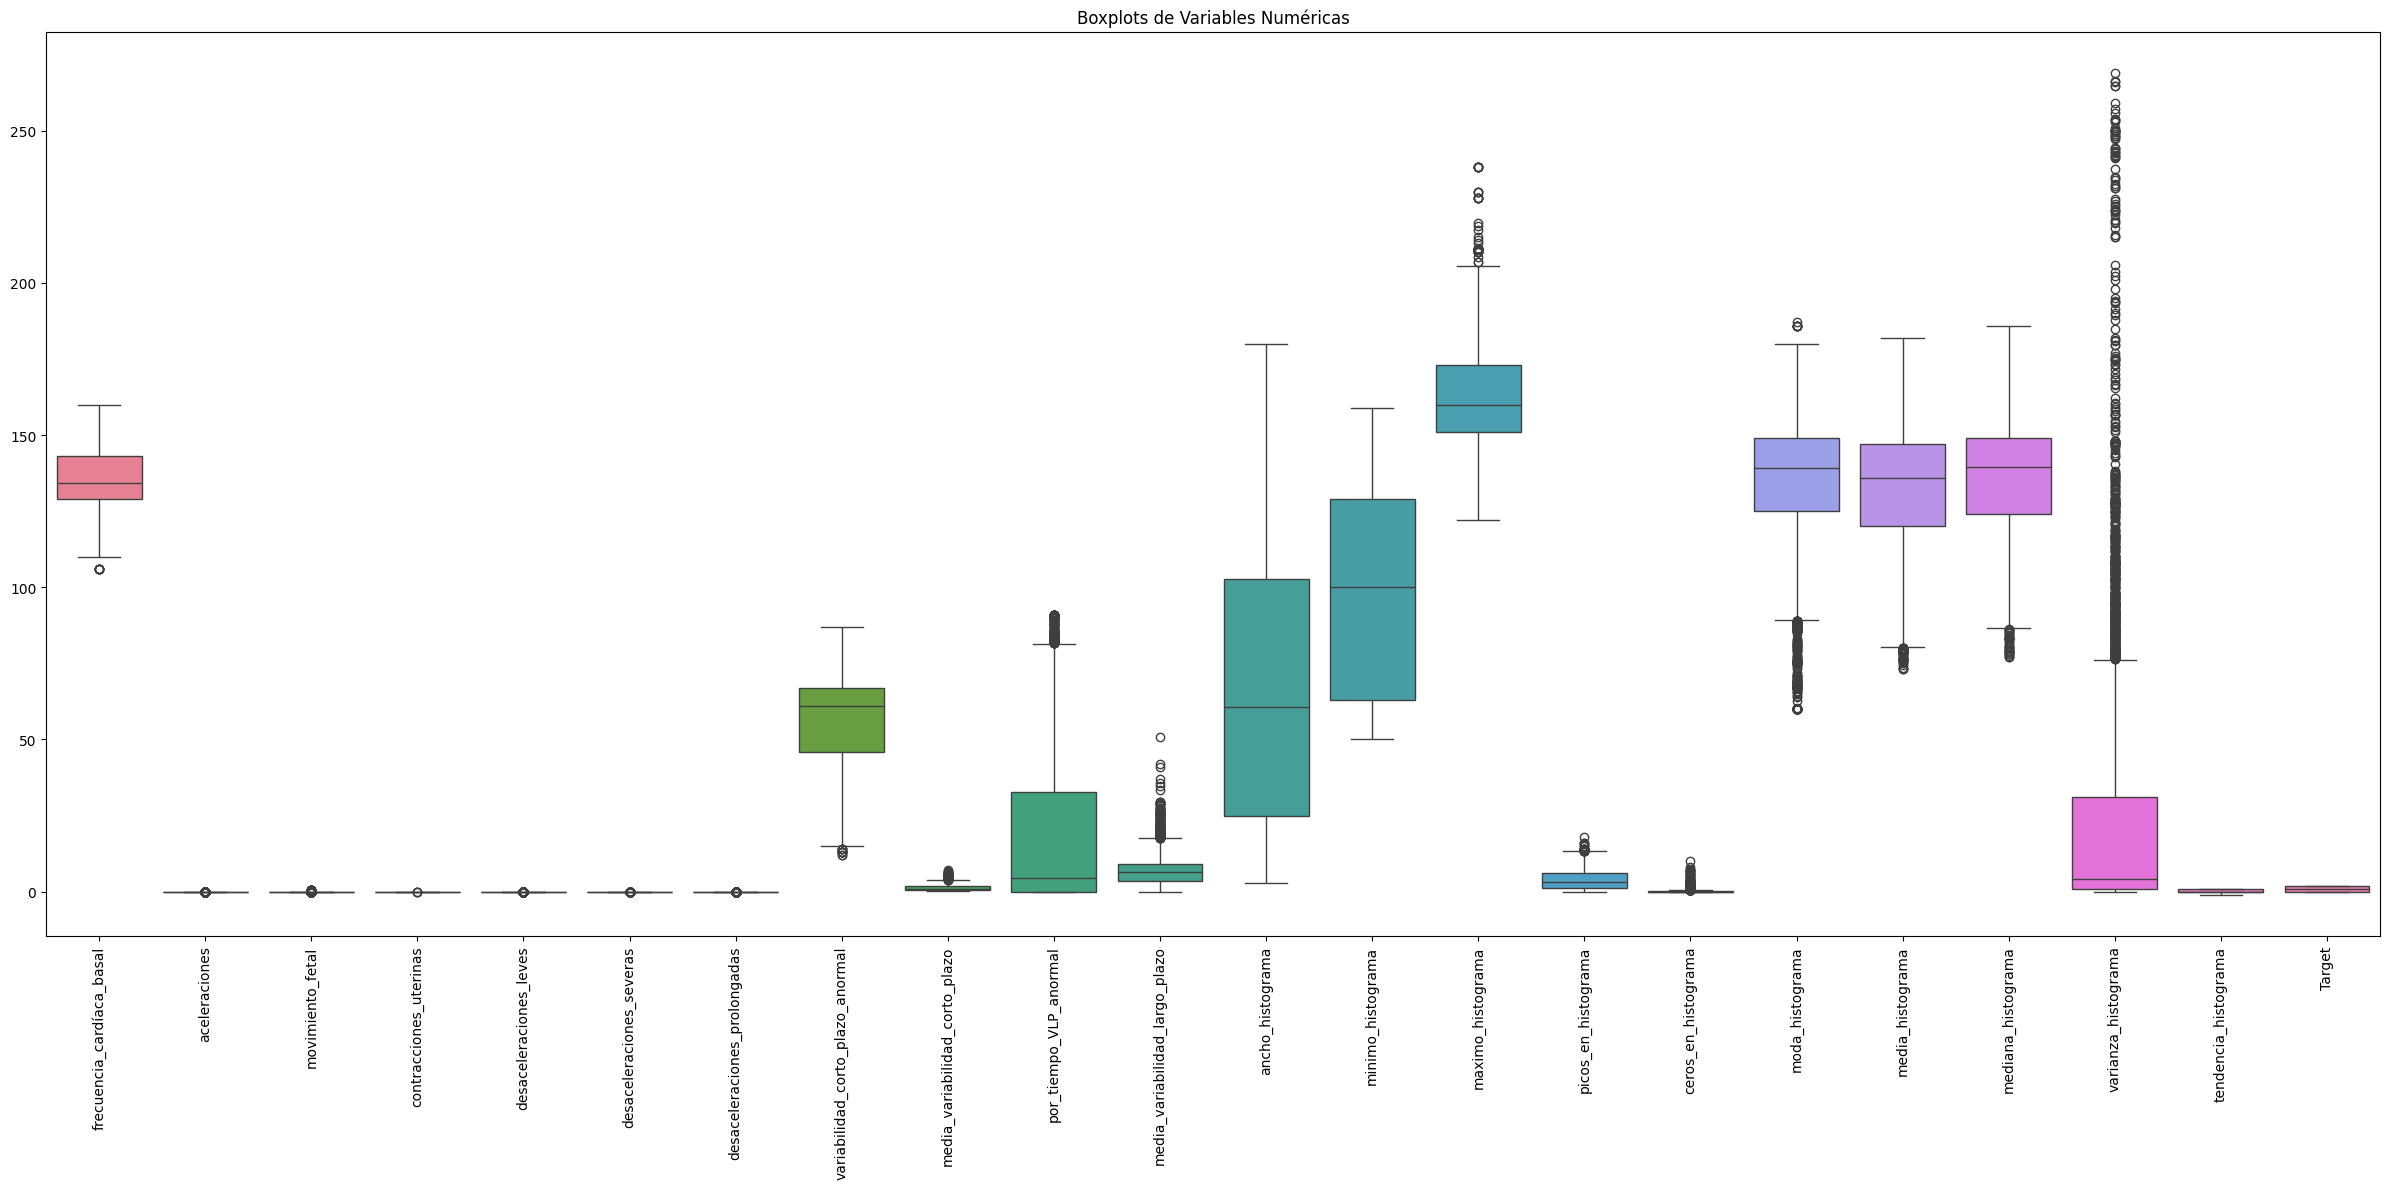

In [15]:
# Boxplots para visualizar outliers
plt.figure(figsize=(24, 12))
sns.boxplot(data=data_balanceada)
plt.xticks(rotation=90, ha='center')
plt.title("Boxplots de Variables Numéricas")
plt.tight_layout()
plt.show()

## Interpretación:

1. **Hay dos tipos de features (variables):**

Las variables que tienen una distribución estable o bien concentrada, por ejemplo: frecuencia cardíaca basal, medias, medianas. Y las variables que tienen un distribución muy esparcida, por ejemplo: aceleraciones, desaceleraciones, movimiento fetal, lo cual es normal en monitoreo fetal.

2. **Presencia de valores atipicos:**

En variables como variabilidad, picos, ceros, varianza, hay casos extremos. Esto refleja que en algunos registros hay comportamientos muy distintos al promedio → probablemente son los fetos en riesgo.

3. **Variabilidad dentro de los trazos:**

Los features estadisticos (media, mediana, moda, mínimo, máximo, varianza) muestran que los trazos de frecuencia cardíaca tienen comportamientos bastante diversos. Esta diversidad es normal en monitoreo fetal, porque los fetos pueden estar en distintos estados de actividad.

##Conclusión:
Es necesario normalizar para reducir la escala de esta variabilidad para facilitar un mejor entrenamiento del modelo y evitar sesgos.

## **Normalización de datos**

In [16]:
# Crear copia del dataset ya balanceado
data_escalonada = data_balanceada.copy()

# Distribución de una variable a las columnas numericas que se escalará
columnas_num = data_escalonada.select_dtypes(include=['float64']).columns.drop('Target')

# Escalamiento el dataset
scaler = StandardScaler()
data_escalonada[columnas_num] = scaler.fit_transform(data_escalonada[columnas_num])

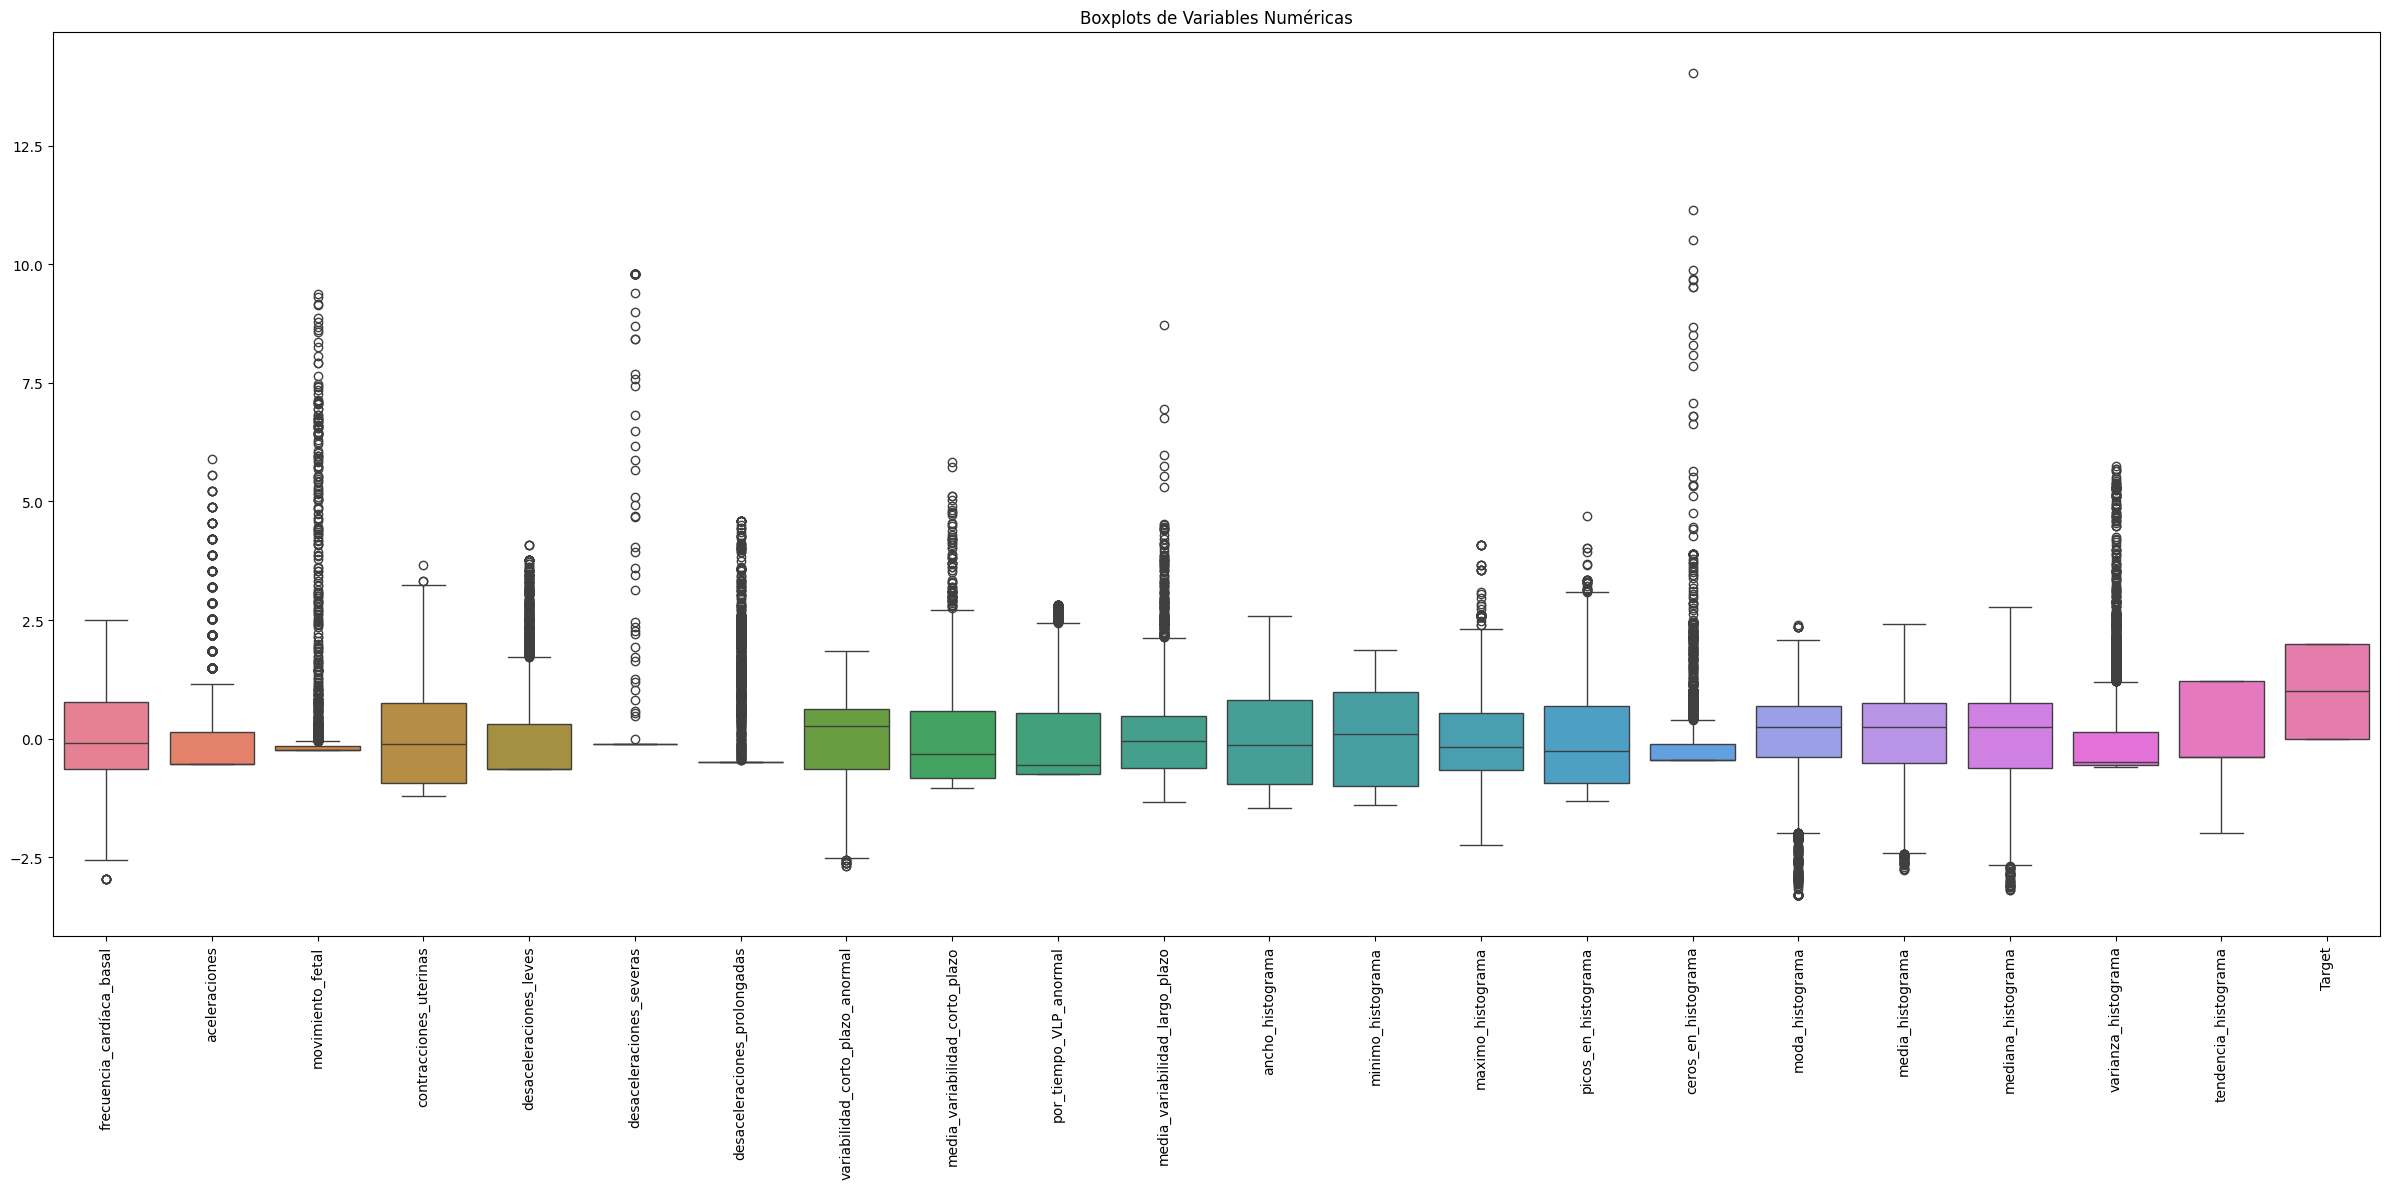

In [17]:
# Boxplots para visualizar outliers escalonados
plt.figure(figsize=(24, 12))
sns.boxplot(data=data_escalonada)
plt.xticks(rotation=90, ha='center')
plt.title("Boxplots de Variables Numéricas")
plt.tight_layout()
plt.show()

##Interpretación:

* Todos los features ahora están centradas alrededor de 0 (valor promedio de la varible original) y con dispersión más comparable. Esto permite visualizar mejor la presencia de valores atipicos en cada uno de los features.

* Los valores atipicos no desaparecen, lo que demuestra (en pequeña medida) que estamos tratando con datos cercanos a la realidad. Para evitar sesgos con estos valores atipicos será necesario la elección de un algoritmo robusto a outliers.

In [18]:
# Convertir datos categoricos numericos de decimales a enteros para tener flexibilidad en los entrenamientos de los modelos.
data_escalonada["Target"] = data_escalonada["Target"].astype(int)

# Comprobar conversión
data_escalonada["Target"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4951 entries, 0 to 4950
Series name: Target
Non-Null Count  Dtype
--------------  -----
4951 non-null   int64
dtypes: int64(1)
memory usage: 38.8 KB


# 📊 Análisis Bivariado:

## Matriz de Correlación

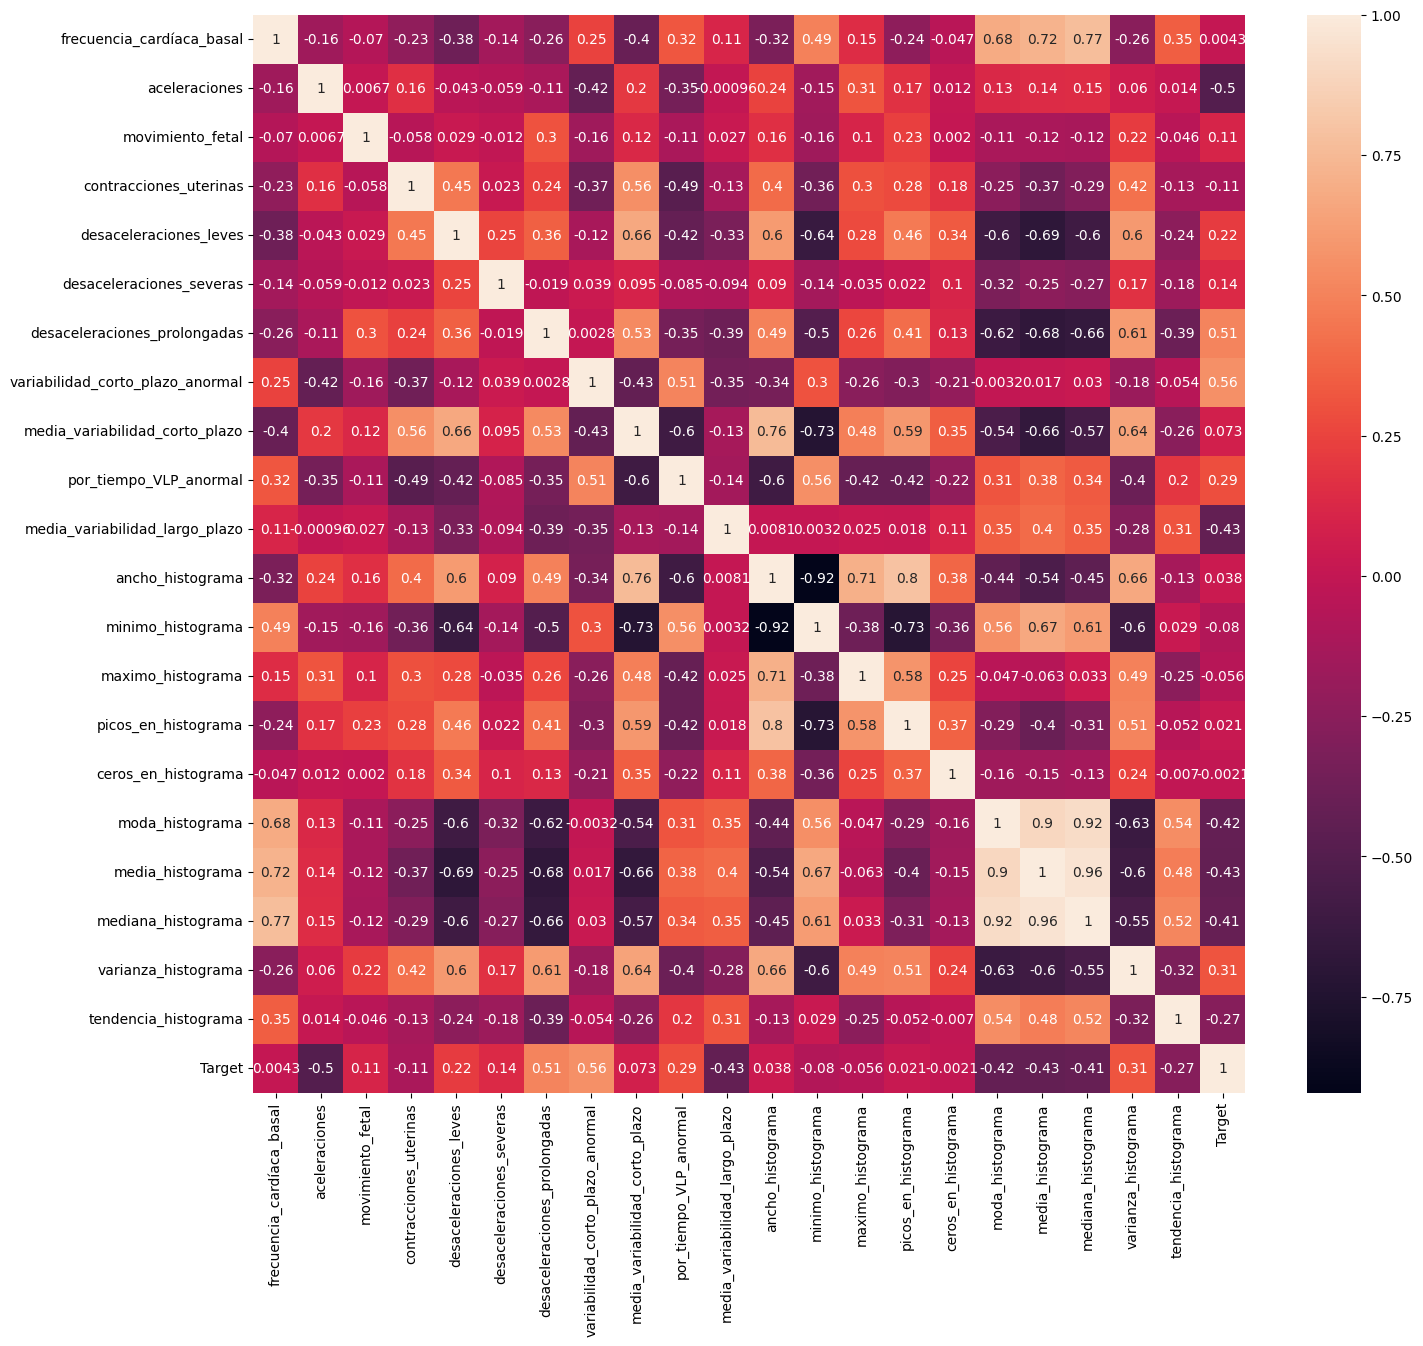

In [19]:
# Analizar la correlación de las caracteristicas con respecto a la columna objetivo.
plt.figure(figsize=(16,14))
sns.heatmap(data_escalonada.corr(),annot=True)
plt.show()

##Interpretación:

* La correlación entre las varibles predictoras y la variable 'Target' es baja. Esto es normal en los analisis medicos, pues demuestran que el estado fetal depende de la combinación de multiples variables, por ende, no será necesario aplicar reducción de dimensionalidad a ninguna de las variables.
* Existe redundancia entre algunas variables.

In [20]:
# Renombrar el dataset "data_escalonada" a "data_analizada", para saber que los datos que estamos entrenando ya estan completamente analizados
data_analizada = data_escalonada

# **3. PIPELINE/DIVISÓN DE DATOS**

In [21]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = data_analizada.drop(['Target'],axis=1)
y = data_analizada['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
# 3515 instancias train
# 1436 instancias test

# **4. PIPELINE/SELECCIÓN, CONTRUCCIÓN Y ENTRENAMIENTO DEL MODELO**

# **eXtreme Gradient Boosting :**

In [22]:
# Codificar etiquetas
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Entrenar XGBoost con etiquetas transformadas
model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),  # Número de clases detectadas automáticamente
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train_encoded)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:13:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [23]:
# Predecir y revertir etiquetas si lo deseas
y_pred_encoded = model.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred_xgb)

serie = pd.Series(accuracy,index=['eXtreme Gradient Boosting'])
accuracy_model = pd.DataFrame({'accuracy':serie})

# 5. PIPELINE/EVALUACIÓN DEL MÓDELO


# Evaluación General

In [24]:
y_predict = model.predict(X_test)

In [25]:
# Crear tabla comparativa
comparison_table = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_predict)': y_predict
})

# Mostrar las primeras filas de la tabla comparativa
print("\nTabla comparativa:")
print(comparison_table)


Tabla comparativa:
      Valor Real (y_test)  Predicción (y_predict)
1135                    0                       0
3697                    2                       2
1921                    0                       0
843                     0                       0
1882                    0                       0
...                   ...                     ...
40                      0                       0
2276                    1                       1
3926                    2                       2
1452                    0                       0
3419                    1                       1

[1486 rows x 2 columns]


#**Analisis:**

A primera vista, el modelo esta haciendo predicciones precisas. Se realizará predicciones particulares y se graficará la matrix de confusión para medir el nivel de presición del modelo.

# Evaluaciones particulares

**Crear función para Automatizar la forma en que podemos enviarle una instancia individual y que nos devuelva la predicción.**

In [26]:

def predecir_salud_fetal(model, frecuencia_cardiaca_basal, aceleraciones, movimiento_fetal, contracciones_uterinas,
                    desaceleraciones_leves, desaceleraciones_severas, desaceleraciones_prolongadas,
                    variabilidad_corto_plazo_anormal, media_variabilidad_corto_plazo, por_tiempo_VLP_anormal,
                    media_variabilidad_largo_plazo, ancho_histograma, minimo_histograma, maximo_histograma,
                    picos_en_histograma, ceros_en_histograma, moda_histograma, media_histograma, mediana_histograma,
                    varianza_histograma, tendencia_histograma):
    """
    Predice si llueve (1) o no (0) basado en los parámetros meteorológicos.

    Args:
        frecuencia_cardíaca_basal:
        aceleraciones:
        movimiento_fetal:
        contracciones_uterinas:
        desaceleraciones_leves:
        desaceleraciones_severas:
        desaceleraciones_prolongadas:
        variabilidad_corto_plazo_anormal:
        media_variabilidad_corto_plazo:
        %_tiempo_VLP_anormal:
        media_variabilidad_largo_plazo:
        ancho_histograma, minimo_histograma:
        maximo_histograma:
        picos_en_histograma:
        ceros_en_histograma:
        moda_histograma: media_histograma:
        mediana_histograma:
        varianza_histograma:
        tendencia_histograma:

    Returns:
        int: 0 (Normal), 1 (Sospechoso) o 2 (Patologico)
    """
    # Crear array 2D con los valores en el orden correcto
    instancia = [[
        frecuencia_cardiaca_basal, aceleraciones, movimiento_fetal, contracciones_uterinas,
        desaceleraciones_leves, desaceleraciones_severas, desaceleraciones_prolongadas,
        variabilidad_corto_plazo_anormal, media_variabilidad_corto_plazo, por_tiempo_VLP_anormal,
        media_variabilidad_largo_plazo, ancho_histograma, minimo_histograma, maximo_histograma,
        picos_en_histograma, ceros_en_histograma, moda_histograma, media_histograma, mediana_histograma,
        varianza_histograma, tendencia_histograma
]]
    return model.predict(instancia)[0]  # [0] para extraer el valor único

In [27]:
# Prueba #2 (valores actualizados)
prediccion = predecir_salud_fetal(
    model=model,
    frecuencia_cardiaca_basal=124.0,
    aceleraciones=13,
    movimiento_fetal=0.0,
    contracciones_uterinas=6,
    desaceleraciones_leves=0.0,
    desaceleraciones_severas=0.0,
    desaceleraciones_prolongadas=0.0,
    variabilidad_corto_plazo_anormal=34.0,
    media_variabilidad_corto_plazo=1.0,
    por_tiempo_VLP_anormal=0.0,
    media_variabilidad_largo_plazo=0.9,
    ancho_histograma=39.0,
    minimo_histograma=110.0,
    maximo_histograma=149.0,
    picos_en_histograma=3.0,
    ceros_en_histograma=0.0,
    moda_histograma=129.0,
    media_histograma=130.0,
    mediana_histograma=131.0,
    varianza_histograma=5.0,
    tendencia_histograma=0.0
)

# Mostrar la predicción traducida
if prediccion == 0:
    print("Predicción: Normal")
elif prediccion == 1:
    print("Predicción: Sospechoso")
elif prediccion == 2:
    print("Predicción: Patológico")
else:
    print(f"Predicción desconocida: {prediccion}")

Predicción: Normal


In [28]:
# Prueba #3
prediccion = predecir_salud_fetal(
    model=model,
    frecuencia_cardiaca_basal=146.0,
    aceleraciones=0.0,
    movimiento_fetal=3,
    contracciones_uterinas=0.0,
    desaceleraciones_leves=0.0,
    desaceleraciones_severas=0.0,
    desaceleraciones_prolongadas=0.0,
    variabilidad_corto_plazo_anormal=81.0,
    media_variabilidad_corto_plazo=0.2,
    por_tiempo_VLP_anormal=67.0,
    media_variabilidad_largo_plazo=3.9,
    ancho_histograma=13.0,
    minimo_histograma=137.0,
    maximo_histograma=150.0,
    picos_en_histograma=1.0,
    ceros_en_histograma=0.0,
    moda_histograma=146.0,
    media_histograma=144.0,
    mediana_histograma=146.0,
    varianza_histograma=1.0,
    tendencia_histograma=0.0
)

# Mostrar la predicción traducida
if prediccion == 0:
    print("Predicción: Normal")
elif prediccion == 1:
    print("Predicción: Sospechoso")
elif prediccion == 2:
    print("Predicción: Patológico")
else:
    print(f"Predicción desconocida: {prediccion}")

Predicción: Patológico


In [29]:
# Prueba #4 (valores actualizados)
prediccion = predecir_salud_fetal(
    model=model,
    frecuencia_cardiaca_basal=146.0,
    aceleraciones=0.0,
    movimiento_fetal=21,
    contracciones_uterinas=0.0,
    desaceleraciones_leves=0.0,
    desaceleraciones_severas=0.0,
    desaceleraciones_prolongadas=0.0,
    variabilidad_corto_plazo_anormal=68.0,
    media_variabilidad_corto_plazo=0.3,
    por_tiempo_VLP_anormal=23.0,
    media_variabilidad_largo_plazo=7.2,
    ancho_histograma=20.0,
    minimo_histograma=136.0,
    maximo_histograma=156.0,
    picos_en_histograma=1.0,
    ceros_en_histograma=0.0,
    moda_histograma=147.0,
    media_histograma=147.0,
    mediana_histograma=148.0,
    varianza_histograma=1.0,
    tendencia_histograma=0.0
)

# Mostrar la predicción traducida
if prediccion == 0:
    print("Predicción: Normal")
elif prediccion == 1:
    print("Predicción: Sospechoso")
elif prediccion == 2:
    print("Predicción: Patológico")
else:
    print(f"Predicción desconocida: {prediccion}")


Predicción: Patológico


In [30]:
# Prueba #6 (valores actualizados)
prediccion = predecir_salud_fetal(
    model=model,
    frecuencia_cardiaca_basal=133.0,
    aceleraciones=0.0,
    movimiento_fetal=0.0,
    contracciones_uterinas=0.0,
    desaceleraciones_leves=0.0,
    desaceleraciones_severas=0.0,
    desaceleraciones_prolongadas=0.0,
    variabilidad_corto_plazo_anormal=73.0,
    media_variabilidad_corto_plazo=0.2,
    por_tiempo_VLP_anormal=88.0,
    media_variabilidad_largo_plazo=3.3,
    ancho_histograma=8.0,
    minimo_histograma=131.0,
    maximo_histograma=139.0,
    picos_en_histograma=1.0,
    ceros_en_histograma=0.0,
    moda_histograma=133.0,
    media_histograma=134.0,
    mediana_histograma=135.0,
    varianza_histograma=0.0,
    tendencia_histograma=0.0
)

# Mostrar la predicción traducida
if prediccion == 0:
    print("Predicción: Normal")
elif prediccion == 1:
    print("Predicción: Sospechoso")
elif prediccion == 2:
    print("Predicción: Patológico")
else:
    print(f"Predicción desconocida: {prediccion}")


Predicción: Patológico


## **Matriz de Confusión : eXtreme Gradient Boosting**

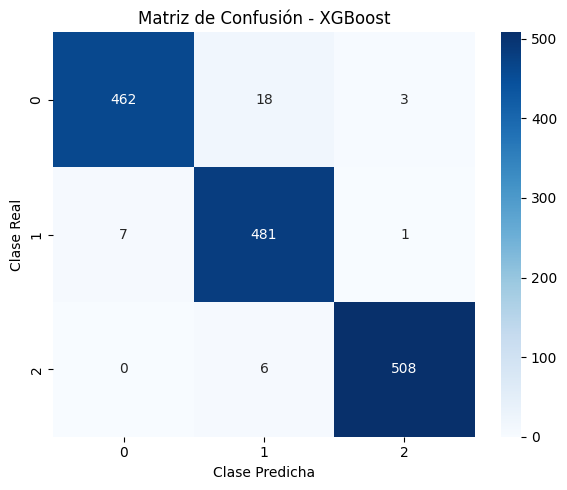

In [31]:
# Matriz de confusión visual con etiquetas 1, 2, 3 (si originalmente eran -1, 0, 1)
conf_matrix = confusion_matrix(y_test, y_pred_xgb, labels=le.classes_)

plt.figure(figsize=(6, 5))
plt.title('Matriz de Confusión - XGBoost')
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=[c for c in le.classes_],  # Por ejemplo, -1 → 0, 0 → 1, 1 → 2
            yticklabels=[c for c in le.classes_])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.tight_layout()
plt.show()

In [32]:
# Evaluar
print('Accuracy de XGBoost: {:.4f}'.format(accuracy))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred_xgb))

Accuracy de XGBoost: 0.9764

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       483
           1       0.95      0.98      0.97       489
           2       0.99      0.99      0.99       514

    accuracy                           0.98      1486
   macro avg       0.98      0.98      0.98      1486
weighted avg       0.98      0.98      0.98      1486





---



In [33]:
# Guardar el modelo entrenado
import joblib

joblib.dump(model, 'modelo_salud_fetal.pkl')
print("Modelo guardado como 'modelo_salud_fetal.pkl'")

Modelo guardado como 'modelo_salud_fetal.pkl'
